<a href="https://colab.research.google.com/github/youngchanseo/Hon.Gong.Machine-SNU/blob/main/(06_2_1)_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0_%EC%A4%91%EC%8B%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과일 사진 데이터 준비하기

In [4]:
# 1절에서 사용한 데이터셋 불러오기.
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

# 넘파이 np.load() 함수 사용해 npy 파일을 읽어 넘파이 배열을 준비함. k-평균 모델을 훈련하기 위해 (샘플 개수, 너비, 높이) 크기의 3차원 배열을 (샘플 개수, 너비x높이) 크기를 가진 2차원 배열로 변경함.
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

import numpy as np
fruits = np.load('fruits_300.npy') # load() method에 파일 이름을 전달함: numpy에서 npy 파일 로드
fruits_2d = fruits.reshape(-1, 100*100)

#사이킷런의 k_평균 알고리즘은 sklearn.cluster 모듈 아래 KMeans 클래스에 구현되어 있음
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)









import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    #figsize는  ratio 매개변수에 비례하여 커짐. 기본값 1

  # 2중 for 반복문을 사용하여 먼저 첫 번째 행을 따라 이미지를 그림.
  # 그리고 두번째 행의 이미지를 그리는 식으로 계속됨

    n = len(arr)    # n은 샘플 개수입니다
  # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10개로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

--2024-02-10 20:16:05--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-02-10 20:16:05--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-02-10 20:16:05--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


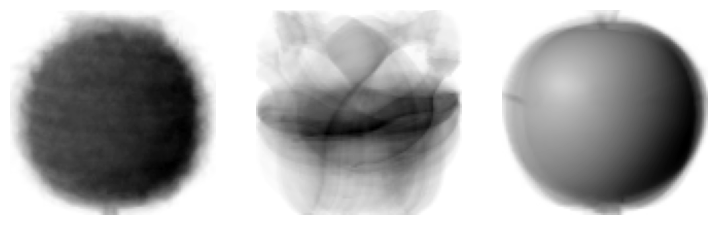

In [6]:
#Kmeans class가 최종적으로 찾은 cluster_centers_속성에 있음
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3)

#이 배열은 fruits_2d 샘플의 cluster 중심이기에, 각 중심을 이미지로 출력하려면 100*100크기의 2차원 배열로 바꿔야함


KMeans class: 훈련 데이터 샘플에서 cluster 중심까지 거리로 변환해주는 transform()method를 가지고 있음. 마치 StandardScaler class처럼 특성값을 변환하는 도구로 사용할 수 있다는 의미

인덱스가 100인 샘플에 trnasform () method 적용
  - fit() method와 마찬가지로 2차원 배열을 기대
  - fruits_2d[100]처럼 쓰면 (10000,)크기의 배열이 되므로 에러가 발생함

슬라이싱 연산자를 사용해서 (1, 1000)크기의 배열을 전달해보자


In [8]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]



하나의 샘플을 전달헀기에, 반환된 배열은 크기가 (1)인 (클러스터 개수) 2차원 배열임

- 1 번째 클러스터 (레이블 0): 첫 번째 원소 값
- 2 번째 클러스터 (레이블 1): 두 번째 원소 값


In [11]:
#KMeans class는 가장 가까운 클러스터 중심을 예측 클래스로 출력하는 predict() method를 제공
print(km.predict(fruits_2d[100:101]))

[0]


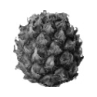

In [12]:
#transform ()의결과에서 짐작할 수 있듯이, 레이블 0으로 예측. 레이블 2는 파인애플이였으믈, 이 샘플은 파인애플일 것임

draw_fruits(fruits[100:101])

In [13]:
print(km.n_iter_)

#알고리즘이 반복한 횟수

4


# 최적의 K찾기

과일 데이터 셋을 사용해, 이너셔 inertia (cluster 중심과, cluster에 속한 샘플 사이의 거리) 계산해보자.

KMeans class: 자동으로 inertia 계산

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

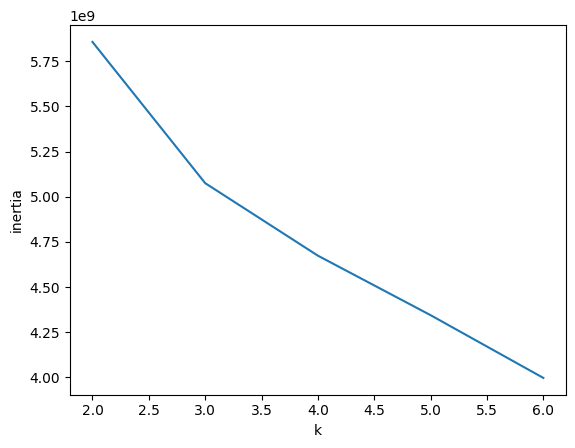

In [15]:
inertia= []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

k = 3에서 그래프의 기울기가 조금 바뀜

엘보우 지점보다 cluster 개수가 많아지면, 이너셔의 변화가 줄어들면서, 군집 효과도 줄어듦